In [32]:
import plot_utils
from plot_utils import *
import pickle

In [33]:
e1, d1 = getModel()

gru.weight_ih_l0 torch.Size([48, 16])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])
gru.weight_ih_l0 torch.Size([48, 16])
gru.weight_hh_l0 torch.Size([48, 16])
gru.bias_ih_l0 torch.Size([48])
gru.bias_hh_l0 torch.Size([48])


In [43]:
xword = 'i'

with open('../data/nonsence_english_corpus_train.txt', 'r') as fin:
    tmp = fin.readlines()

sent_list = []
for sent in tmp:
    sent = sent.strip().split()
    if xword in sent:
        sent_list.append(' '.join(sent))

In [44]:
with open('../data/ig_neuron_words_impact_dict.pkl', 'rb') as fin:
    ig_neuron_words_impact_dict = pickle.load(fin)

In [126]:
import random

len_ls = []

_sent = []

random.shuffle(sent_list)
random.shuffle(sent_list)
random.shuffle(sent_list)
for s in sent_list:
    if len(s.strip().split()) not in len_ls:
        print(s)
        len_ls.append(len(s.strip().split()))
        _sent.append(s)

tom is the you ? a i to . n't
i the n't . you is a to
? i the to n't is tom
a to i ? the . n't tom is
to i tom n't ? you
. n't i a tom
is you i
tom a i you
the i
i


In [105]:
t = text2batch('n\'t i you ? is . the')
_, _, t_decoded_sentence, t_en_hn, t_de_hn, t_er, t_ei, t_en, t_dr, t_di, t_dn = predictWithAutoencoderHiddenAndGates(t, e1, d1)
_t_sentence = predict2sentence(t['sentence'], t_decoded_sentence)
print(_t_sentence)

[("<SOS> n't i you ? is . the <EOS>", "<SOS> n't i you ? is . the <EOS>")]


In [106]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
from IPython.display import display
import ipywidgets as widgets

# imp_neurons = list(ig_neuron_words_impact_dict['that'].keys())
sentence = _t_sentence[0][1].split() + _t_sentence[0][1].split()
x = _t_sentence[0][1].split() + _t_sentence[0][1].split()
_nn = [3,10,11]
yr = np.concatenate((t_er, t_dr), axis=0)[:, _nn]
yi = np.concatenate((t_ei, t_di), axis=0)[:, _nn]
yn = np.concatenate((t_en, t_dn), axis=0)[:, _nn]
y = np.concatenate((t_en_hn, t_de_hn), axis=0)[:, _nn]

def print_sentence_range(sent_range, 
                         threshold, th_greater=True, th_inbetween=False,
                         th_r_gates=False, th_z_gates=False, th_n_gates=False, th_neurons=False,
                         BG=None, 
                         R_gates=False, Z_gates=False, N_gates=False, Neurons=False):
    # Display Text
    _str = ' '.join(sentence[:sent_range[0]])
    _str += ' <font color="red">' + ' '.join(sentence[sent_range[0]:sent_range[1]+1]) + '</font> '
    _str += ' ' + ' '.join(sentence[sent_range[1]+1:])
    _str = _str.replace('<SOS>', '&lt;SOS&gt;')
    _str = _str.replace('<EOS>', '&lt;EOS&gt;')
    _ = widgets.HTML(
        value=_str
    )
    display(_)

    # Find all neurons/gates
    def activeElement(steps, threshold, elements, th_greater):
        if th_greater:
            return np.where(np.sum(elements[range(steps[0], steps[1]+1), :] >= threshold, axis=0) == (steps[1]-steps[0])+1 )[0]
        else:
            return np.where(np.sum(elements[range(steps[0], steps[1]+1), :] < threshold, axis=0) == (steps[1]-steps[0])+1 )[0]
    
    _neuron = set([])
    
    if th_inbetween:
        _th_max = threshold[1]
        _th_min = threshold[0]
        if th_r_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th_max, yr, False))
                _neuron &= set(activeElement(sent_range, _th_min, yr, True))
            else:
                _neuron = set(activeElement(sent_range, _th_max, yr, False))
                _neuron &= set(activeElement(sent_range, _th_min, yr, True))

        if th_z_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th_max, yi, False))
                _neuron &= set(activeElement(sent_range, _th_min, yi, True))
            else:
                _neuron &= set(activeElement(sent_range, _th_max, yi, False))
                _neuron &= set(activeElement(sent_range, _th_min, yi, True))

        if th_n_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th_max, yn, False))
                _neuron &= set(activeElement(sent_range, _th_min, yn, True))
            else:
                _neuron &= set(activeElement(sent_range, _th_max, yn, False))
                _neuron &= set(activeElement(sent_range, _th_min, yn, True))

        if th_neurons:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th_max, y, False))
                _neuron &= set(activeElement(sent_range, _th_min, y, True))
            else:
                _neuron &= set(activeElement(sent_range, _th_max, y, False))
                _neuron &= set(activeElement(sent_range, _th_min, y, True))
    else:
        _th = threshold[1]
        if th_r_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th, yr, th_greater))
            else:
                _neuron &= set(activeElement(sent_range, _th, yr, th_greater))

        if th_z_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th, yi, th_greater))
            else:
                _neuron &= set(activeElement(sent_range, _th, yi, th_greater))

        if th_n_gates:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th, yn, th_greater))
            else:
                _neuron &= set(activeElement(sent_range, _th, yn, th_greater))

        if th_neurons:
            if len(_neuron) == 0:
                _neuron = set(activeElement(sent_range, _th, y, th_greater))
            else:
                _neuron &= set(activeElement(sent_range, _th, y, th_greater))
    
    
    # Display Selected neurons/gates
    _ = widgets.HTML(
        value="Selected Neurons/gates: {}".format(' '.join([str(i) for i in _neuron]))
    )
    display(_)
    
    fig, ax = plt.subplots(figsize=(18, 8))
    
    _ = plt.axvline(x=sent_range[0], linewidth=1.2, linestyle='--', color='r')
    _ = plt.axvline(x=sent_range[1], linewidth=1.2, linestyle='--', color='r')
    _ = plt.axhline(y=threshold[1], linewidth=1.2, linestyle='--', color='r')
    if th_inbetween:
        _ = plt.axhline(y=threshold[0], linewidth=1.2, linestyle='--', color='r')
    
    for i in BG:
        if i != 'None':
            if i == 'Neurons':
                _ = plt.plot(range(len(x)), y, alpha=0.5)
#                 _ = plt.plot(range(len(x)), y, color='gray', alpha=0.5)
            
            if i == 'R Gates':
                _ = plt.plot(range(len(x)), yr, color='gray', alpha=0.5)
                
            if i == 'Z Gates':
                _ = plt.plot(range(len(x)), yi, alpha=0.5)
#                 _ = plt.plot(range(len(x)), yi, color='gray', alpha=0.5)
                
            if i == 'N Gates':
                _ = plt.plot(range(len(x)), yn, color='gray', alpha=0.5)
    
    _ = plt.xticks(range(len(x)), x, rotation='vertical')
    for i in range(sent_range[0], sent_range[1]+1):
        ax.get_xticklabels()[i].set_color("blue")
        ax.get_xticklabels()[i].set_fontsize(20)

    try:
        _neuron = list(_neuron)
        if Neurons:
            _ = plt.plot(range(len(x)), y[:, _neuron], color='C3', linewidth=2.5, label='Neuron {}'.format(_neuron))
        if R_gates:
            _ = plt.plot(range(len(x)), yr[:, _neuron], color='C4', linewidth=2.5, label='R Gate')
        if Z_gates:
            _ = plt.plot(range(len(x)), yi[:, _neuron], color='C2', linewidth=2.5, label='Z Gate')
        if N_gates:
            _ = plt.plot(range(len(x)), yn[:, _neuron], color='C1', linewidth=2.5, label='N Gate')
    except:
        pass
    
    return _neuron


# Setting widgets

## word control -----
words_slider = widgets.SelectionRangeSlider(options=range(len(sentence)),
                                            index=(0, len(sentence)-1),
                                            description='Select Words',
                                            continuous_update=False)
## end word control -----

## threshold control -----
threshold_slider = widgets.FloatRangeSlider(value=[-1.0, 0.5],
                                            min=-1.0,
                                            max=1.0,
                                            step=0.01,
                                            description='Threshold',
                                            continuous_update=False,
                                            orientation='horizontal',
                                            readout=True,
                                            readout_format='.2f')
threshold_greater = widgets.Checkbox(value=True, description='Greater than')
threshold_inbetween = widgets.Checkbox(value=False, description='In Between')

threshold_filter_rgates  = widgets.Checkbox(value=False, description='R gates on/off') 
threshold_filter_zgates  = widgets.Checkbox(value=False, description='Z gates on/off')
threshold_filter_ngates  = widgets.Checkbox(value=False, description='N gates on/off')
threshold_filter_neurons = widgets.Checkbox(value=False, description='Neurons on/off')

_Hb_threshold_selector = widgets.HBox([threshold_greater, threshold_inbetween])
_Hb_threshold_filter01 = widgets.HBox([threshold_filter_rgates, threshold_filter_zgates])
_Hb_threshold_filter02 = widgets.HBox([threshold_filter_ngates, threshold_filter_neurons])
_Vb_threshold = widgets.VBox([_Hb_threshold_selector, threshold_slider, 
                              _Hb_threshold_filter01, _Hb_threshold_filter02])
## end threshold control -----

## Background control -----
BG_options = widgets.SelectMultiple(options=['None', 'Neurons', 'R Gates', 'Z Gates', 'N Gates'], 
                                    value=['Neurons'], 
                                    description='Background')
## end Background control -----

## Selected line control -----
line_rgates = widgets.Checkbox(value=True, description='R gates')
line_zgates = widgets.Checkbox(value=True, description='Z gates')
line_ngates = widgets.Checkbox(value=True, description='N gates')
line_neurons = widgets.Checkbox(value=True, description='Neurons')

_Vb_lines = widgets.VBox([line_rgates, line_zgates, line_ngates, line_neurons])
## end Selected line control -----

parent_widgets = widgets.interactive(print_sentence_range, sent_range=words_slider, 
                                     threshold=threshold_slider, 
                                     th_greater=threshold_greater, th_inbetween=threshold_inbetween,
                                     th_r_gates=threshold_filter_rgates, th_z_gates=threshold_filter_zgates, 
                                     th_n_gates=threshold_filter_ngates, th_neurons=threshold_filter_neurons,
                                     BG=BG_options, 
                                     R_gates=line_rgates, Z_gates=line_zgates, N_gates=line_ngates, Neurons=line_neurons)

_Hb01 = widgets.HBox([words_slider, _Vb_threshold, BG_options, _Vb_lines])

display(_Hb01, parent_widgets.children[-1])


Output()

In [139]:
first_word_dict = {}

random.shuffle(sent_list)
random.shuffle(sent_list)
random.shuffle(sent_list)

for _s in sent_list:
    _ = _s.strip().split()
    firstword = _[0]
    length = len(_)
    
    if firstword not in first_word_dict:
        first_word_dict[firstword] = [None for i in range(3, 11)]
        
    if length > 2:
        first_word_dict[firstword][length-3] = _s

In [151]:
first_word_dict.keys()

dict_keys(['.', '?', 'i', 'tom', "n't", 'a', 'you', 'the', 'to', 'is'])

[('<SOS> to i the <EOS>', '<SOS> a the the <EOS>')]
[('<SOS> to a i you <EOS>', "<SOS> to n't ? you <EOS>")]
[('<SOS> to i tom is you <EOS>', '<SOS> to i tom is you <EOS>')]
[("<SOS> to is n't the tom i <EOS>", "<SOS> to is n't the tom i <EOS>")]
[("<SOS> to n't you the i is ? <EOS>", "<SOS> to n't you the i is ? <EOS>")]
[("<SOS> to a tom . n't i the you <EOS>", "<SOS> to a tom . n't i the you <EOS>")]
[("<SOS> to n't tom ? i the is a . <EOS>", "<SOS> to n't tom ? i the is a . <EOS>")]
[("<SOS> to the you tom i ? a n't is . <EOS>", "<SOS> to the you tom i ? a is n't . <EOS>")]


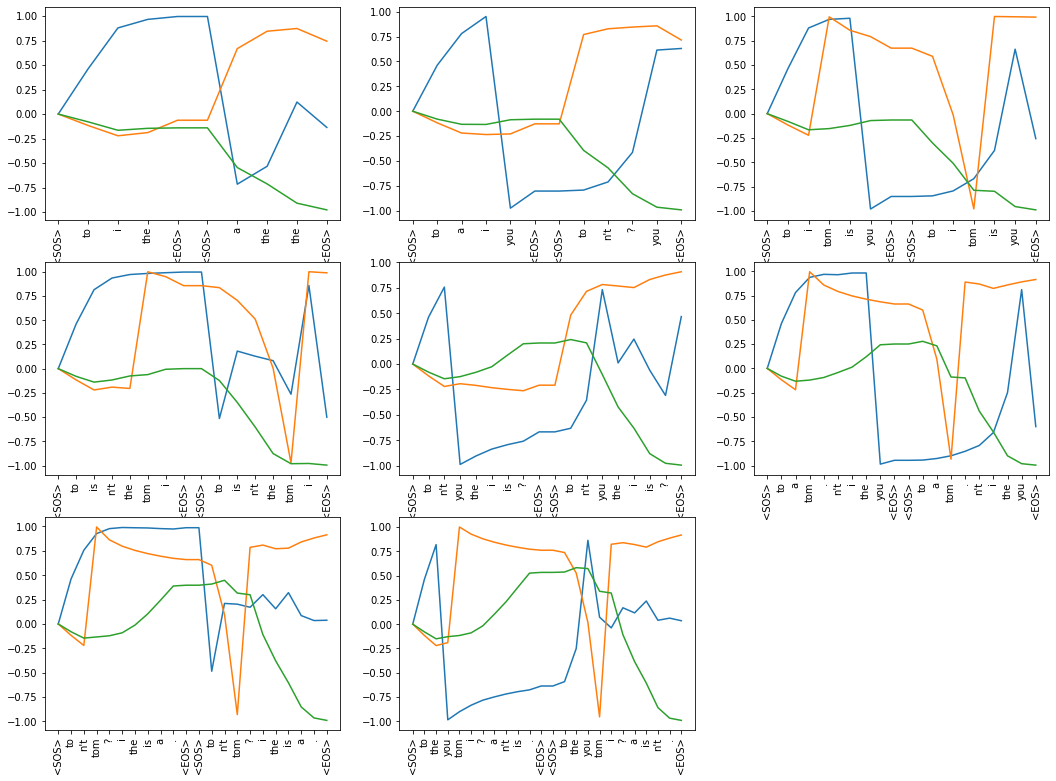

In [213]:
figure = plt.figure(figsize=(18,18))

_sent = sorted(first_word_dict['to'], key=lambda x: len(x.strip().split()))

for _idx, _s in enumerate(_sent):
    t = text2batch(_s)
    _, _, t_decoded_sentence, t_en_hn, t_de_hn, t_er, t_ei, t_en, t_dr, t_di, t_dn = predictWithAutoencoderHiddenAndGates(t, e1, d1)
    _t_sentence = predict2sentence(t['sentence'], t_decoded_sentence)
    print(_t_sentence)

    sentence = _t_sentence[0][1].split() + _t_sentence[0][1].split()
    x = _t_sentence[0][0].split() + _t_sentence[0][1].split()
    _nn = [10,13,14]
    yr = np.concatenate((t_er, t_dr), axis=0)[:, _nn]
    yi = np.concatenate((t_ei, t_di), axis=0)[:, _nn]
    yn = np.concatenate((t_en, t_dn), axis=0)[:, _nn]
    y = np.concatenate((t_en_hn, t_de_hn), axis=0)[:, _nn]

    plt.subplot(4,3, _idx+1)
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.plot(range(len(x)), y)